<a href="https://colab.research.google.com/github/William-Stephen-Jones/WSJ/blob/main/CNN_PneumoniaCXR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [ ]:
# Import general libraries
import numpy as np 
## N-dimensional array computing, with efficient element-wise operations and broadcasting.
import matplotlib.pyplot as plt 
## creating static, animated, and interactive visualizations in Python, providing a wide 
## range of customizable plots and charts for data visualization.
import matplotlib.image as mpimg
from PIL import Image

# Import ML libraries
import tensorflow as tf

import os
# This code imports the os module, which provides a way to interact with the operating system. 
# This module is used in the code you provided to set up the paths for the input data and the output model.

import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import load_img
from sklearn.metrics import classification_report, confusion_matrix




Mount my Google Drive, where the data is. [note: I need to get the correct path for my drive]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


Set file paths

In [ ]:
base_dir = '/content/drive/MyDrive/DAIM_Project_PneumoniaCXR/chest_xray'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

In [ ]:
# setup folders
os.listdir(train_dir)
train_n = train_dir+'/NORMAL/'
train_p = train_dir+'/PNEUMONIA/'
train_n, train_p

('/content/drive/MyDrive/DAIM_Project_PneumoniaCXR/chest_xray/train/NORMAL/',
 '/content/drive/MyDrive/DAIM_Project_PneumoniaCXR/chest_xray/train/PNEUMONIA/')

1341
normal picture title:  IM-0213-0001.jpeg
pneumonia picture title: person282_virus_579.jpeg


Text(0.5, 1.0, 'Pneumonia')

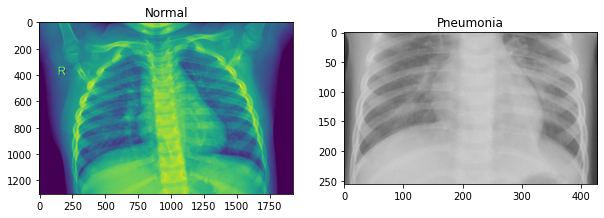

In [ ]:
#Normal pic 
print(len(os.listdir(train_n)))
rand_norm= np.random.randint(0,len(os.listdir(train_n)))
norm_pic = os.listdir(train_n)[rand_norm]
print('normal picture title: ',norm_pic)

norm_pic_address = train_n + norm_pic

#Pneumonia
rand_p = np.random.randint(0,len(os.listdir(train_p)))

sic_pic =  os.listdir(train_p)[rand_norm]
sic_address = train_p+sic_pic
print('pneumonia picture title:', sic_pic)

# Load the images
norm_load = Image.open(norm_pic_address)
sic_load = Image.open(sic_address)

#Let's plt these images
f = plt.figure(figsize= (10,6))
a1 = f.add_subplot(1,2,1)
img_plot = plt.imshow(norm_load)
a1.set_title('Normal')

a2 = f.add_subplot(1, 2, 2)
img_plot = plt.imshow(sic_load)
a2.set_title('Pneumonia')

In [ ]:
img_height = 224
img_width = 224
batch_size = 32

In [ ]:
num_of_test_samples = 600
batch_size = 32

In [ ]:
# let's build the CNN model

cnn = Sequential()

#Convolution
cnn.add(Conv2D(32, (3, 3), activation="relu", input_shape=(64, 64, 3)))

#Pooling
cnn.add(MaxPooling2D(pool_size = (2, 2)))

# 2nd Convolution
cnn.add(Conv2D(32, (3, 3), activation="relu"))

# 2nd Pooling layer
cnn.add(MaxPooling2D(pool_size = (2, 2)))

# Flatten the layer
cnn.add(Flatten())

# Fully Connected Layers
cnn.add(Dense(activation = 'relu', units = 128))
cnn.add(Dense(activation = 'sigmoid', units = 1))

# Compile the Neural network
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
# Fitting the CNN to the images
# The function ImageDataGenerator augments your image by iterating through 
# image as your CNN is getting ready to process that image

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)  #Image normalization.

training_set = train_datagen.flow_from_directory(train_dir,
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory(val_dir,
                                                        target_size=(64, 64),
                                                        batch_size=32, 
                                                        class_mode='binary')

test_set = test_datagen.flow_from_directory(test_dir,
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [ ]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)               8

In [ ]:
cnn_model = cnn.fit_generator(training_set,
                         steps_per_epoch = 163,
                         epochs = 1,
                         validation_data = validation_generator,
                         validation_steps = 624)

<ipython-input-11-54bbfc3cc336>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  cnn_model = cnn.fit_generator(training_set,


163/163 [==============================] - ETA: 0s - loss: 0.3626 - accuracy: 0.8332

163/163 [==============================] - 614s 4s/step - loss: 0.3626 - accuracy: 0.8332 - val_loss: 0.3355 - val_accuracy: 0.8125


In [ ]:
test_accu = cnn.evaluate_generator(test_set,steps=624)
print('The testing accuracy is :',test_accu[1]*100, '%')

<ipython-input-12-e3e116046788>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_accu = cnn.evaluate_generator(test_set,steps=624)


The testing accuracy is : 81.89102411270142 %


In [ ]:
Y_pred = cnn.predict_generator(test_set, 100)
y_pred = np.argmax(Y_pred, axis=1)
max(y_pred)

<ipython-input-13-9bc6ac013fad>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = cnn.predict_generator(test_set, 100)


0

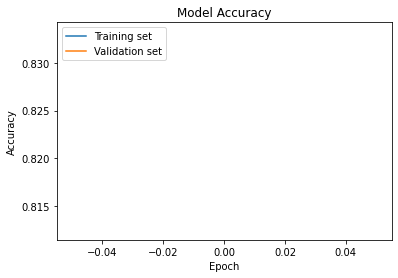

In [ ]:
# Accuracy 
plt.plot(cnn_model.history['accuracy'])
plt.plot(cnn_model.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set'], loc='upper left')
plt.show()

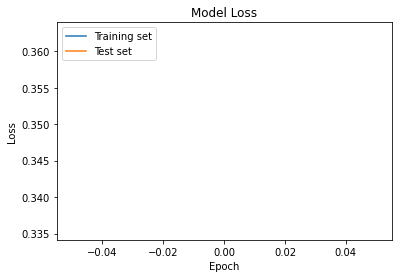

In [ ]:
# Loss 
plt.plot(cnn_model.history['val_loss'])
plt.plot(cnn_model.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Test set'], loc='upper left')
plt.show()

In [ ]:
print(cnn_model.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [ ]:
cnn_model.history['accuracy'],
cnn_model.history['val_accuracy']

[0.8125]

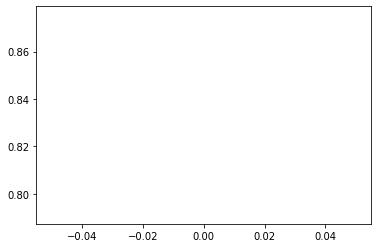

In [ ]:
plt.plot(cnn_model.history['accuracy'])